In [1]:
# import libraries
import numpy as numpy
import pandas as pd

In [2]:
data1 = pd.read_excel("LCA_Disclosure_Data_FY2020_Q1.xlsx")
data2 = pd.read_excel("LCA_Disclosure_Data_FY2020_Q2.xlsx")
data3 = pd.read_excel("LCA_Disclosure_Data_FY2020_Q3.xlsx")
data4 = pd.read_excel("LCA_Disclosure_Data_FY2020_Q4.xlsx")

In [3]:
newdata = data1.append(data2).append(data3).append(data4)
newdata

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-19268-393467,Certified,2019-09-25,2019-10-01,NaT,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-19268-638983,Certified,2019-09-25,2019-10-01,NaT,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-19268-177184,Certified,2019-09-25,2019-10-01,NaT,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-19268-936403,Certified,2019-09-25,2019-10-01,NaT,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-19268-394079,Certified,2019-09-25,2019-10-01,NaT,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,LEGAL@THEEGIANTS.COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117390,I-203-20261-831316,Withdrawn,2020-09-17,2020-09-18,NaT,E-3 Australian,Chief Financial Officer,11-1011.00,Chief Executives,Y,...,NaN,NaN,NaN,NaN,Disclose Employment,NaN,NaN,NaN,NaN,NaN
117391,I-203-20268-844100,Withdrawn,2020-09-24,2020-09-24,NaT,E-3 Australian,Account Director,11-2022.00,Sales Managers,Y,...,NaN,NaN,NaN,NaN,Disclose Business,Henderson,Corrie,NaN,"Fragomen, Del Rey, Bernsen & Loewy LLP",chenderson@fragomen.com
117392,I-203-20269-845688,Withdrawn,2020-09-25,2020-09-28,NaT,E-3 Australian,OST Teacher,25-9041.00,Teacher Assistants,N,...,NaN,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
117393,I-203-20272-848017,Withdrawn,2020-09-28,2020-09-28,NaT,E-3 Australian,Houzz Inc.,23-1011.00,Lawyers,Y,...,NaN,NaN,NaN,NaN,Disclose Employment,NaN,NaN,NaN,NaN,NaN


In [4]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577334 entries, 0 to 117394
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     577334 non-null  object        
 1   CASE_STATUS                     577334 non-null  object        
 2   RECEIVED_DATE                   577334 non-null  datetime64[ns]
 3   DECISION_DATE                   577334 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              16738 non-null   datetime64[ns]
 5   VISA_CLASS                      577334 non-null  object        
 6   JOB_TITLE                       577333 non-null  object        
 7   SOC_CODE                        577334 non-null  object        
 8   SOC_TITLE                       577334 non-null  object        
 9   FULL_TIME_POSITION              577334 non-null  object        
 10  BEGIN_DATE                      577334 non-null  datetim

In [5]:
cleaned = newdata[['CASE_NUMBER','CASE_STATUS','VISA_CLASS','JOB_TITLE','SOC_CODE','SOC_TITLE','EMPLOYER_STATE']]

In [6]:
h1b = cleaned[cleaned['VISA_CLASS']== 'H-1B']

In [7]:
# H-1B success rate 
print('total H-1B applicants: %s' % len(h1b))
print('H-1B Certified number: % s' % len(h1b[h1b['CASE_STATUS']=='Certified']))
print('H-1B Certified - Withdrawn number: % s' % len(h1b[h1b['CASE_STATUS']=='Certified - Withdrawn']))
print('H-1B Withdrawn number: % s' % len(h1b[h1b['CASE_STATUS']=='Withdrawn']))
print('H-1B Denied numbers: % s' % len(h1b[h1b['CASE_STATUS']=='Denied']))
print('H-1B Certified rate: %%% s' %(len(h1b[h1b['CASE_STATUS']=='Certified']) / len(h1b) * 100))
print('H-1B Withdrawn rate: %%% s' %(len(h1b[h1b['CASE_STATUS']=='Withdrawn']) / len(h1b) * 100))
print('H-1B Denied rate: %%% s' %(len(h1b[h1b['CASE_STATUS']=='Denied']) / len(h1b) * 100))
print('H-1B Withdrawn rate: %%% s' %(len(h1b[h1b['CASE_STATUS']=='Withdrawn']) / len(h1b) * 100))

total H-1B applicants: 564251
H-1B Certified number: 533801
H-1B Certified - Withdrawn number: 16337
H-1B Withdrawn number: 10677
H-1B Denied numbers: 3436
H-1B Certified rate: %94.60346547901554
H-1B Withdrawn rate: %1.8922429911511014
H-1B Denied rate: %0.6089488543219241
H-1B Withdrawn rate: %1.8922429911511014


H-1B applicants number in California 105506
California occupation ratio: %18.69841613041005
New York occupation ratio: %18.69841613041005


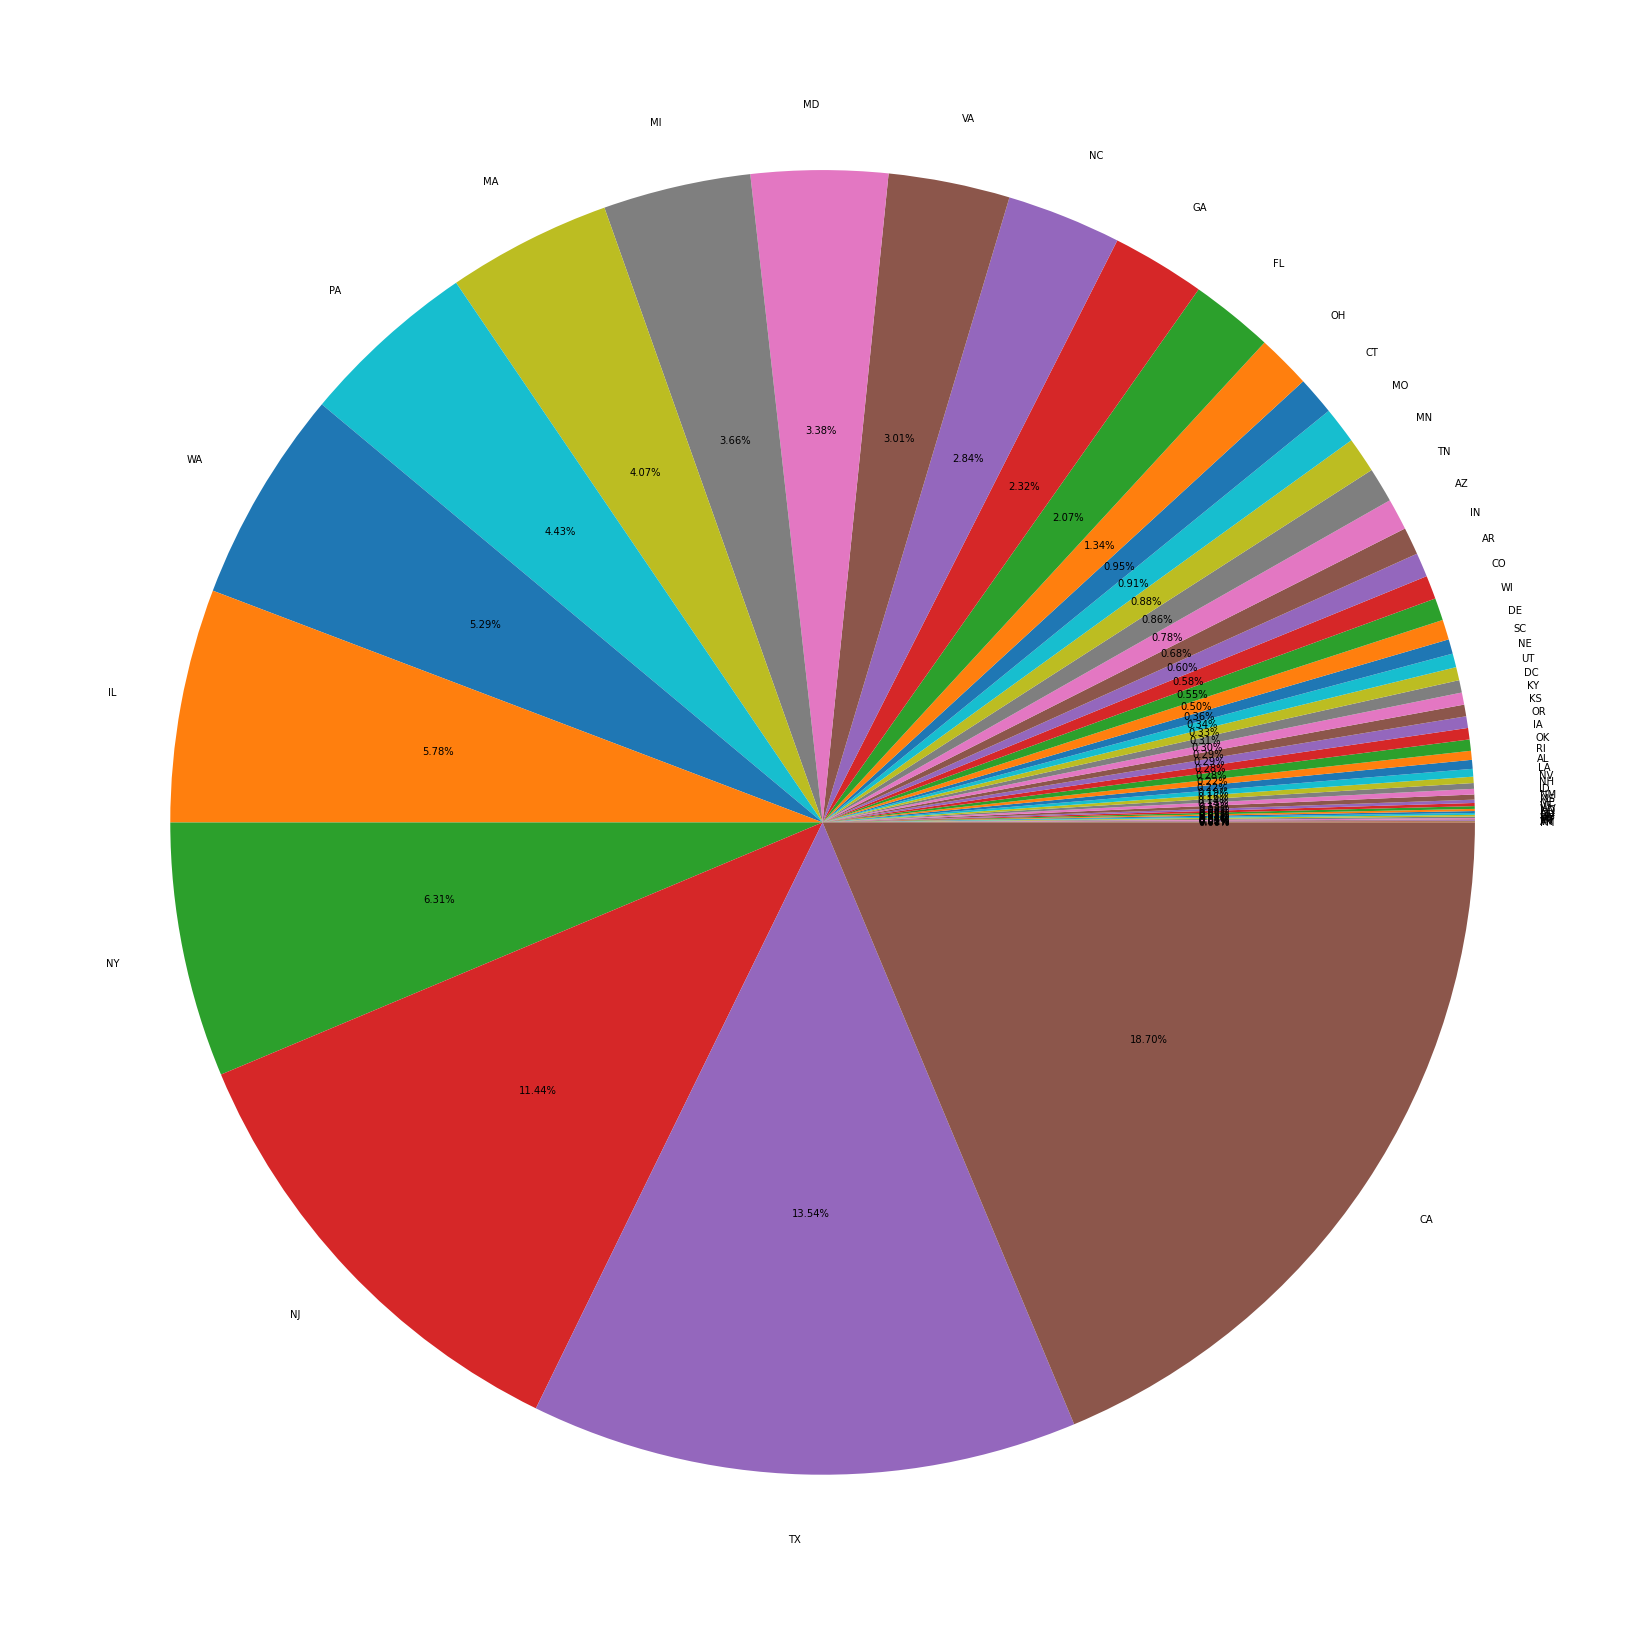

<Figure size 432x288 with 0 Axes>

In [8]:
h1b_ca = h1b[h1b['EMPLOYER_STATE']== 'CA']
h1b_ny = h1b[h1b['EMPLOYER_STATE']== 'NY']
states = h1b['EMPLOYER_STATE'].unique()
print('H-1B applicants number in California %s' % len(h1b_ca))
print('California occupation ratio: %%%s' %(len(h1b_ca)/len(h1b) * 100))
print('New York occupation ratio: %%%s' %(len(h1b_ca)/len(h1b) * 100))
occupationratio = []
for i in states:
      occupationratio.append([i,len(h1b[h1b['EMPLOYER_STATE']== i])/len(h1b)])
occupationratio = pd.DataFrame(occupationratio).sort_values(by = [1])

import matplotlib.pyplot as plt

fig = plt.figure(1,figsize=(30,30))
plt.pie(occupationratio[1] ,labels=occupationratio[0],autopct='%1.2f%%')
plt.show()  
plt.savefig("PieChart.jpg")

跟我吃饭啦~ 我在跟姑姑講話lol 哈哈哈 姑姑很多觟 我姑妈也是啦 妈妈也是啦~ 姑姑每週一次～～ 那她野挺关心你的呢~~ 我也要啦,哈哈哈 你也要紅包嗎哈哈 我要你就可以了呢~ ^_^

In [46]:
mrklist = h1b[h1b['JOB_TITLE'].str.contains('market',case=False,na=False)]
mrklist


,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,EMPLOYER_STATE
331,I-200-19247-509659,Certified,H-1B,MARKETING SPECIALIST,13-1161,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,NJ
332,I-200-19266-869428,Certified,H-1B,MARKET RESEARCH ANALYST,13-1161,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,NY
368,I-200-19263-952084,Certified,H-1B,MARKETING ANALYST,13-1161,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,TX
661,I-200-19266-051776,Certified,H-1B,"VP, MARKETING ANALYTICS MANAGER",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",IL
695,I-200-19267-399454,Certified,H-1B,"DIRECTOR, GLOBAL MEDIA & MARKETING",11-2021,MARKETING MANAGERS,NY
...,...,...,...,...,...,...,...
116970,I-200-20259-822802,Withdrawn,H-1B,Marketing Specialist,13-1161.00,Market Research Analysts and Marketing Special...,TX
117144,I-200-20265-836582,Withdrawn,H-1B,"Data Scientist, Growth Marketing",15-2031.00,Operations Research Analysts,CA
117241,I-200-20268-844634,Withdrawn,H-1B,Director - Marketing Technology & Strategy,15-1199.10,Search Marketing Strategists,VA
117242,I-200-20268-844668,Withdrawn,H-1B,Assistant Professor of Marketing,25-1011.00,"Business Teachers, Postsecondary",OH


In [47]:
print('included market title numbers: %s' % len(mrklist))
print('Marketing title certified rate: %%% s' %(len(mrklist[mrklist['CASE_STATUS']=='Certified']) / len(mrklist) * 100))
print('Marketing title denied rate: %%% s' %(len(mrklist[mrklist['CASE_STATUS']=='Denied']) / len(mrklist) * 100))

included market title numbers: 4666
Marketing title certified rate: %93.65623660522931
Marketing title denied rate: %1.6716673810544362


In [41]:
listofmrktitle = mrklist['JOB_TITLE']
listofmrktitle

331                             MARKETING SPECIALIST
332                          MARKET RESEARCH ANALYST
368                                MARKETING ANALYST
661                  VP, MARKETING ANALYTICS MANAGER
695               DIRECTOR, GLOBAL MEDIA & MARKETING
                             ...                    
116970                          Marketing Specialist
117144              Data Scientist, Growth Marketing
117241    Director - Marketing Technology & Strategy
117242              Assistant Professor of Marketing
117318     Visiting Professor - Marketing Management
Name: JOB_TITLE, Length: 4666, dtype: object